# Exploratory Data Analysis : Haberman's Cancer Patient's Survival Dataset


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#convert datset to dataframe
df = pd.read_csv('https://datahub.io/machine-learning/haberman/r/haberman.csv')

#display dataframe with initial 5 rows
df.head()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
#Display informations such as number and name of columns, their datatypes and number of points
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Age_of_patient_at_time_of_operation         306 non-null    int64
 1   Patients_year_of_operation                  306 non-null    int64
 2   Number_of_positive_axillary_nodes_detected  306 non-null    int64
 3   Survival_status                             306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [19]:
#Display HIgh level statistics
df.describe()

,Age,op_year,axil_nodes,surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Survival status (class attribute):
1 = the patient survived 5 years or longer <br>
 2 = the patient died within 5 year

In [4]:
#Renaming columns to shorter column names
df = df.rename(columns = {"Age_of_patient_at_time_of_operation":"Age", "Patients_year_of_operation":"op_year","Number_of_positive_axillary_nodes_detected":"axil_nodes", "Survival_status": "surv_status" })

In [5]:
df.head()

,Age,op_year,axil_nodes,surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
# How many patients have survival status of each 1 and 2
df['surv_status'].value_counts()

# it is an imbalanced dataset as the number of data points class of survived patients is more than that of died patient

1    225
2     81
Name: surv_status, dtype: int64

## Univariate analysis

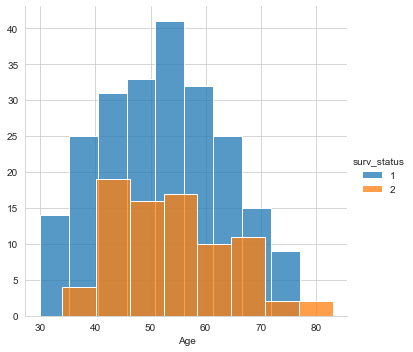

In [84]:
# With Age
sns.FacetGrid(df, hue='surv_status', height = 5)\
    .map(sns.histplot, 'Age')\
    .add_legend()
plt.show()

### Observations:
1. There are no patients with age less than 30
2. Patients with age after around 75 do not survive
3. Patients from age upto 40 are highly likely to survive
4. There are more number of surving patients than non-surviving in each age groups till 75


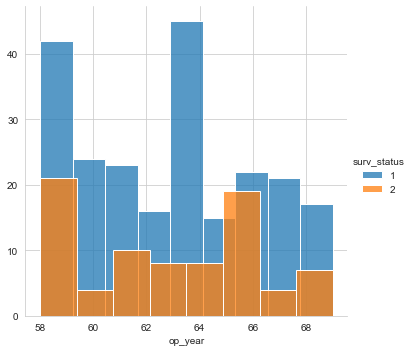

In [82]:
# With op_year
sns.FacetGrid(df, hue='surv_status', height = 5)\
    .map(sns.histplot, 'op_year')\
    .add_legend()
plt.show()

## Observation:
Due to considerable overlapping, it's dificult to make an interpretation

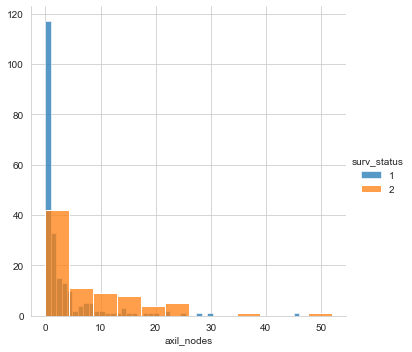

In [83]:
# With axil_nodes
sns.FacetGrid(df, hue='surv_status', height = 5)\
    .map(sns.histplot, 'axil_nodes')\
    .add_legend()
plt.show()

## Observations:
1. Most number of patients have around o to 5 nodes 
2. very rare number of patients have more than 25 nodes and they rarely survive
3. Patients who have 0 to around 2 nodes are more likely to survive
4. Patients having more than 2-3 nodes have lesser chances of survival

## Final Observation:
1. Age of a patient at the time of operation and number of positive axilary nodes detected are two main parameters that have significant impact on survival status of a patient
2. Patients' year of operation doesn't seem to have any significance in deciding the survival status of a patient.

## PDF and CDF of surv_status with Age, axil_node

PDF: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
CDFs: [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
PDF: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
CDFs: [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


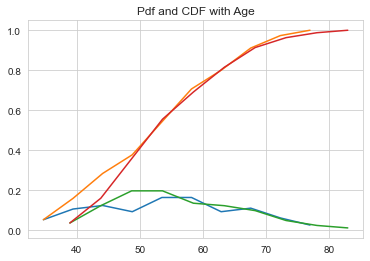

In [8]:
survivors = df.loc[df.surv_status == 1]
non_survivors = df.loc[df.surv_status == 2]

# Survivors
counts, bin_edges = np.histogram(survivors['Age'], bins = 10, density = True )

pdf = counts/(sum(counts))
print('PDF:', pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
print('CDFs:', cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# Non-survivors
counts, bin_edges = np.histogram(non_survivors['Age'], bins = 10, density = True )

pdf = counts/(sum(counts))
print('PDF:', pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
print('CDFs:', cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('Pdf and CDF with Age')
plt.show()

Here, blue line is pdf for survivors and orange line is cdf for survivors. similarly, green line is pdf for non-survivors and red line is cdf for non-survivors

## Observations:
1. Since the orange line (cdf for survivors) ends at 77 on x-axis, people more than 77 years of age are not likely to survive
2. Since the red and green lines start at 34 on x-axis, people below 34 years of age are not likely to die.

PDF: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
CDFs: [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
PDF: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
CDFs: [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]


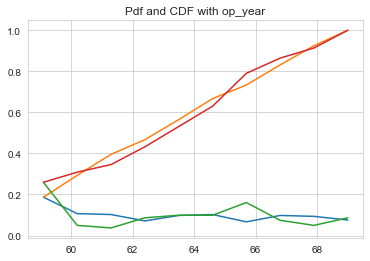

In [18]:
# Survivors
counts, bin_edges = np.histogram(survivors['op_year'], bins = 10, density = True )

pdf = counts/(sum(counts))
print('PDF:', pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
print('CDFs:', cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# Non-survivors
counts, bin_edges = np.histogram(non_survivors['op_year'], bins = 10, density = True )

pdf = counts/(sum(counts))
print('PDF:', pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
print('CDFs:', cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('Pdf and CDF with op_year')
plt.show()

## Observation:
Due to considerable overlapping, it's dificult to make an interpretation

PDF: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
CDFs: [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
PDF: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
CDFs: [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


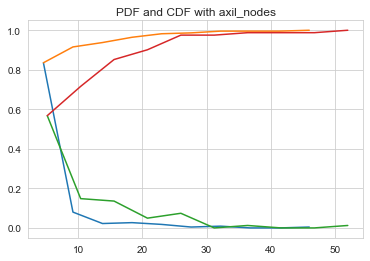

In [9]:
# Survivors
counts, bin_edges = np.histogram(survivors['axil_nodes'], bins = 10, density = True )

pdf = counts/(sum(counts))
print('PDF:', pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
print('CDFs:', cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

# Non-survivors
counts, bin_edges = np.histogram(non_survivors['axil_nodes'], bins = 10, density = True )

pdf = counts/(sum(counts))
print('PDF:', pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
print('CDFs:', cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.title('PDF and CDF with axil_nodes')
plt.show()

## Observations:
1. A patient having more than 46 axilary nodes doesn't survive
2. Patients having more than 30 axillary nodes detected are very rare and most of them are non-survivors

In [12]:
# Let's test the second observation
df[df.axil_nodes>30]

,Age,op_year,axil_nodes,surv_status
62,43,58,52,2
174,54,67,46,1
215,59,62,35,2


As we can see, there are only 3 Patients out of 306 in the dataset that have more than 30 positive axillary nodes detected and only 1 of them survive. Hence, the previous observation was true

## Box Plot

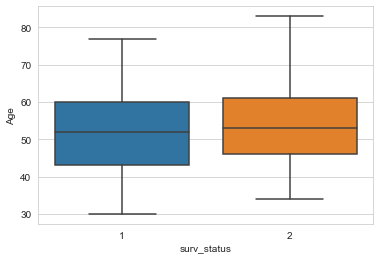

In [14]:
#Age
sns.boxplot(x='surv_status', y='Age', data = df)
plt.show()

### Observation:
Due to considerable overlapping of median and IQR, it's not possible to conclude anything.

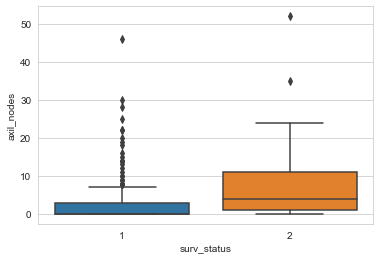

In [16]:
sns.boxplot(x='surv_status', y='axil_nodes', data = df)
plt.show()

### Observation:
50% of patients have around 3 or lesser axillary nodes and most of them survive

## Violin Plot

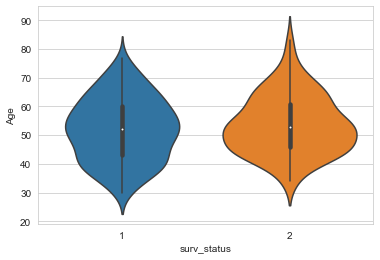

In [15]:
sns.violinplot(x='surv_status', y="Age", data=df)
plt.show()

Observation: The plot is highly overlapping. Hence, it's not possible to make an interpretattion.

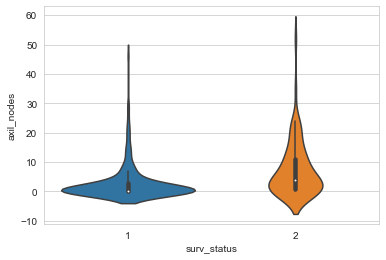

In [17]:
sns.violinplot(x='surv_status', y="axil_nodes", data=df)
plt.show()

Observation:
With the increasing number of nodes, the possibility of surviving of a patient decreases. most patient with 0 nodes survived.

### Conclusion: From univariate analysis, we find that axil_nodes can be slightly useful feature to predict survival status of a patient

#### Now, we'll draw a pair plot to find out which two features can together be used to better predict the survival status

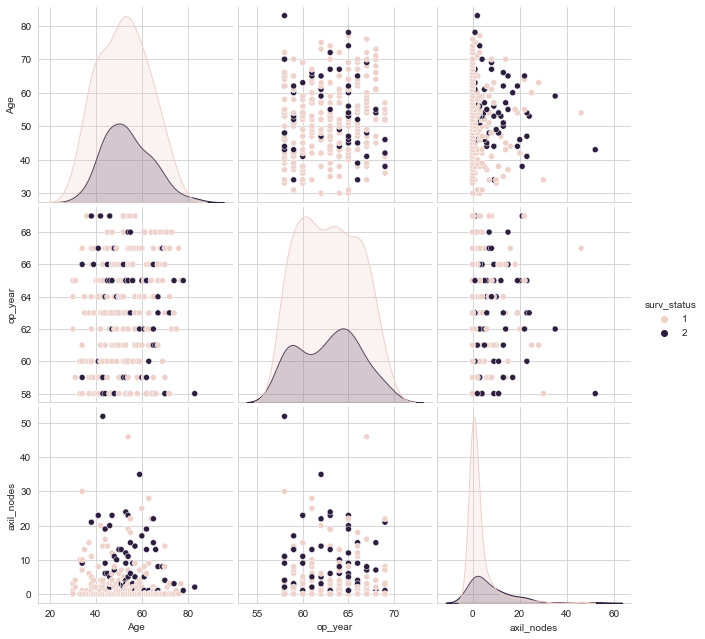

In [7]:
sns.set_style('whitegrid');
sns.pairplot(df, hue = 'surv_status', height = 3)
plt.show()

### Observations:
1. The graph of age versus axil_node might give better results out of all the pairs because we can draw a line or use conditional statements to differentiate between survivors and non-survivors on the basis of age and axil_node values. But, this way, the accuracy can be very low.

# Final Conclusions

1. These three features are not sufficient to predict the survival status of patients.
2. Linear model can not be used to predict the survival status of patients with good accuracy.
3. number of axillary nodes is slightly more useful than other features.
4. operation year is the least important feature to determine survival status.
5. axil_nodes>age>op_year is the order of usefulness of features to determine surv_status